In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [5]:
df = pd.read_csv('/content/drive/MyDrive/datasets/twitter_data.csv',encoding = 'ISO-8859-1',header=None)
df.head()

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [6]:
df.shape

(1600000, 6)

In [7]:
header = ['class', 'id', 'date', 'query', 'hash', 'tweet']

df.columns = header

In [8]:
df.head()

,class,id,date,query,hash,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [9]:
df['query'].value_counts()

NO_QUERY    1600000
Name: query, dtype: int64

In [10]:
df['class'].value_counts()

0    800000
4    800000
Name: class, dtype: int64

In [11]:
df['class']=df['class'].replace(4,1)

In [12]:
df['class'].unique()

array([0, 1])

In [13]:
df.sample(10)

,class,id,date,query,hash,tweet
177924,0,1965834376,Fri May 29 16:37:44 PDT 2009,NO_QUERY,lizkearsey,"this is the worst day ever, i've been told im ..."
1266874,1,1999745097,Mon Jun 01 20:44:47 PDT 2009,NO_QUERY,meganrich09,Pain killers rock. Good night all
814063,1,1550708083,Sat Apr 18 07:00:57 PDT 2009,NO_QUERY,CaptureMe45,@emilyss2086 I can't wait to see it! and be a ...
1068214,1,1965657374,Fri May 29 16:18:30 PDT 2009,NO_QUERY,RealJessicaAlba,@tatianafrosario I know that feeling
615981,0,2226486561,Thu Jun 18 12:00:49 PDT 2009,NO_QUERY,heyannieheyyy,My fave red sunglasses just broke.
697037,0,2253703784,Sat Jun 20 08:36:30 PDT 2009,NO_QUERY,SheaButterr,guess we got spoiled with all that sun yesterd...
296247,0,1997076167,Mon Jun 01 16:12:37 PDT 2009,NO_QUERY,denised118,"who takes an exam about lyrics, meanings and ..."
806160,1,1468771582,Tue Apr 07 03:39:01 PDT 2009,NO_QUERY,moonblessed,@Schofe thanks so much for having the @twitchh...
704616,0,2256102601,Sat Jun 20 12:15:50 PDT 2009,NO_QUERY,tyranasaurusbex,I feel horrid! being ill sucks! I've slept fo...
983620,1,1834307719,Mon May 18 02:26:03 PDT 2009,NO_QUERY,CharnelleWild,I jumped out of bed this morning. Literally


In [14]:
df.iloc[1103065]['tweet']

'http://twitpic.com/6948j Good morning '

In [15]:
df[df['class']==1].head()

,class,id,date,query,hash,tweet
800000,1,1467822272,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,ersle,I LOVE @Health4UandPets u guys r the best!!
800001,1,1467822273,Mon Apr 06 22:22:45 PDT 2009,NO_QUERY,becca210,im meeting up with one of my besties tonight! ...
800002,1,1467822283,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,Wingman29,"@DaRealSunisaKim Thanks for the Twitter add, S..."
800003,1,1467822287,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,katarinka,Being sick can be really cheap when it hurts t...
800004,1,1467822293,Mon Apr 06 22:22:46 PDT 2009,NO_QUERY,_EmilyYoung,@LovesBrooklyn2 he has that effect on everyone


In [16]:
import re
def clean_tweet(tweet):
    # Remove URLs
    tweet = re.sub(r'http\S+', '', tweet)

    # Remove mentions (Twitter handles)
    tweet = re.sub(r'@[^\s]+', '', tweet)

    # Remove hashtags
    tweet = re.sub(r'#([^\s]+)', '', tweet)

    # Remove special characters and punctuation
    tweet = re.sub(r'[^\w\s]', '', tweet)

    # Remove extra whitespaces
    tweet = re.sub(r'\s+', ' ', tweet).strip()

    return tweet

In [17]:
df['tweet'] = df['tweet'].apply(clean_tweet)
df.head()

,class,id,date,query,hash,tweet
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,Awww thats a bummer You shoulda got David Carr...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he cant update his Facebook by t...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,I dived many times for the ball Managed to sav...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,no its not behaving at all im mad why am i her...


In [20]:
df['tweet'][2345]

'Good morning Cant believe this is my last week in London But I will be back in the Marketingworld of London for sure'

In [21]:
df['tidy_tweet'] = df['tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
df['tidy_tweet'][1]

'upset that cant update Facebook texting might result School today also Blah'

In [22]:
tokenized_tweet = df['tidy_tweet'].apply(lambda x:x.split()) #it will split all words by whitespace
tokenized_tweet.head()

0    [Awww, thats, bummer, shoulda, David, Carr, Th...
1    [upset, that, cant, update, Facebook, texting,...
2    [dived, many, times, ball, Managed, save, rest...
3              [whole, body, feels, itchy, like, fire]
4         [behaving, here, because, cant, over, there]
Name: tidy_tweet, dtype: object

In [23]:
from nltk.stem.porter import *
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])

In [24]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i]) #concat all words into one sentence
df['tidy_tweet'] = tokenized_tweet

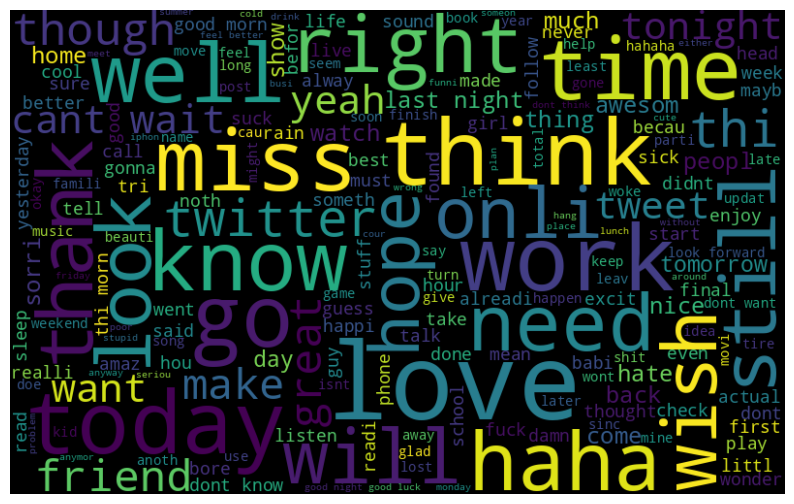

In [25]:
all_words = ' '.join([text for text in df['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

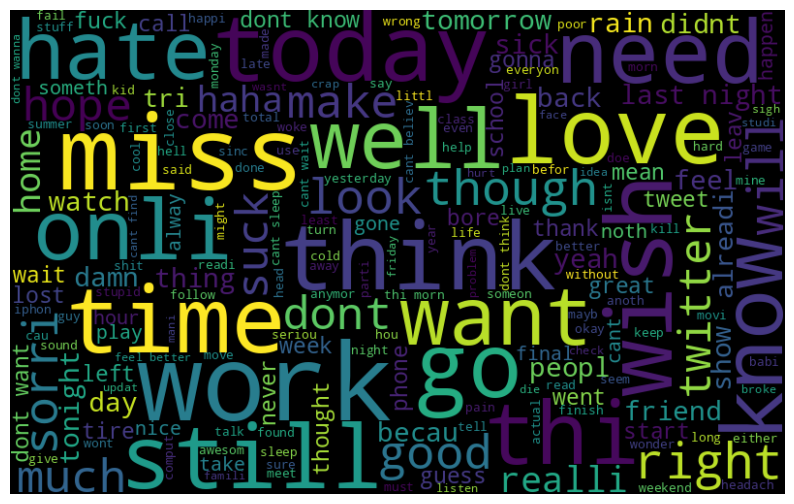

In [26]:
normal_words= ' '.join([text for text in df['tidy_tweet'][df['class']==0]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(normal_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

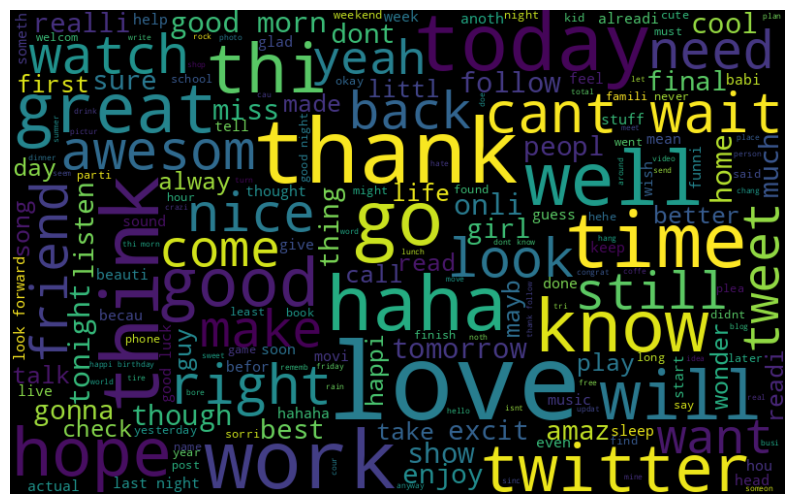

In [28]:
negative_words= ' '.join([text for text in df['tidy_tweet'][df['class']==1]])
wordcloud= WordCloud(width=800,height=500,random_state=21,max_font_size=110).generate(negative_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()